In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import GridSearchCV
import csv


def modelfit(alg, train_data, train_label, test_data, test_label, predictors, performCV=False, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train_data, train_label)
        
    #Predict training set:
    dtrain_predictions = alg.predict(train_data)
    dtrain_predprob = alg.predict_proba(train_data)[:,1]
    fpr_train, tpr_train, thresholds = metrics.roc_curve(train_label, dtrain_predprob)
    auc_train = metrics.auc(fpr_train, tpr_train)
    acc_train = metrics.accuracy_score(train_label, dtrain_predictions)
    rc_train = metrics.recall_score(train_label, dtrain_predictions)
    pc_train = metrics.precision_score(train_label, dtrain_predictions)
    f1_train = metrics.f1_score(train_label, dtrain_predictions)

    #Predict test set:       
    dtest_predictions = alg.predict(test_data)
    dtest_predprob = alg.predict_proba(test_data)[:,1]
    fpr_test, tpr_test, thresholds = metrics.roc_curve(test_label, dtest_predprob)
    auc_test = metrics.auc(fpr_test, tpr_test)
    acc_test = metrics.accuracy_score(test_label, dtest_predictions)    
    rc_test = metrics.recall_score(test_label, dtest_predictions)
    pc_test = metrics.precision_score(test_label, dtest_predictions)
    f1_test = metrics.f1_score(test_label, dtest_predictions)
    
    true_bool = test_label.astype(bool)
    pred_bool = dtest_predictions.astype(bool)
    
    #TP, TN, FP, FN
    TP = np.where(true_bool & pred_bool)[0]
    TN = np.where((~true_bool) & (~pred_bool))[0]
    FP = np.where((~true_bool) & pred_bool)[0]
    FN = np.where(true_bool & (~pred_bool))[0] 
    indices = [TP, TN, FP, FN]
 
    plt.figure(figsize=[20,6])    
    plt.subplot(131)
    plt.plot(fpr_train,tpr_train)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0,1.05])
    plt.title('Train ROC. Accuracy: %.4f, AUC: %.4f, Recall: %.4f' %(acc_train, auc_train, rc_train))
    
    plt.subplot(132)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0,1],[0,1],linestyle='--')
    plt.xlim([-0.05,1.0])
    plt.ylim([0,1.05])
    plt.title('Train ROC. Accuracy: %.4f, AUC: %.4f, Recall: %.4f' %(acc_test, auc_test, rc_test))
               
    #Print Feature Importance:
    feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
    plt.subplot(133)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    plt.show()
        
    metrics_fit = np.array([acc_train, auc_train, rc_train, pc_train, f1_train, acc_test, auc_test, rc_test, pc_test, f1_test])
    return metrics_fit, indices
    
    

Fold 0


{'n_estimators': 60}

{'max_depth': 6, 'min_samples_split': 900}

{'min_samples_leaf': 1}

{'max_features': 7}

{'subsample': 0.85}

Simple Tree


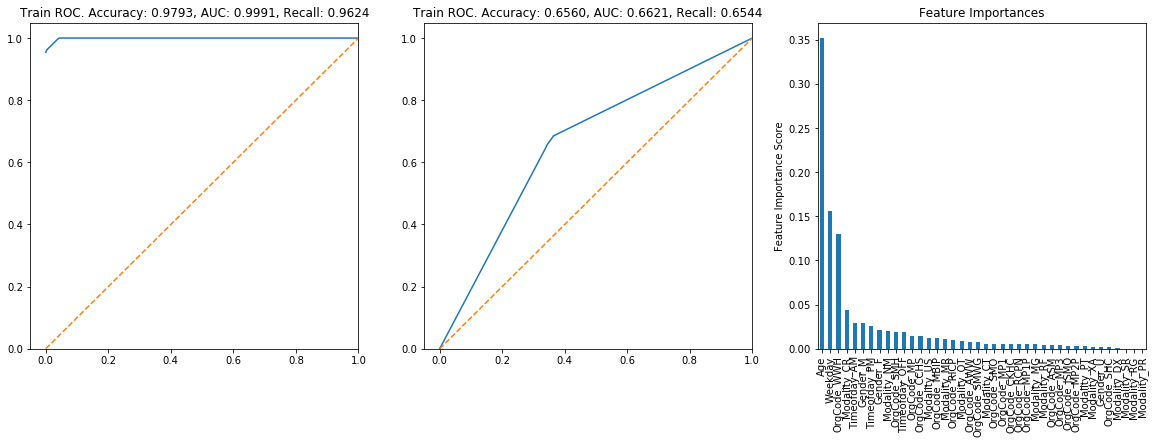

BEFORE OPTIMIZATION


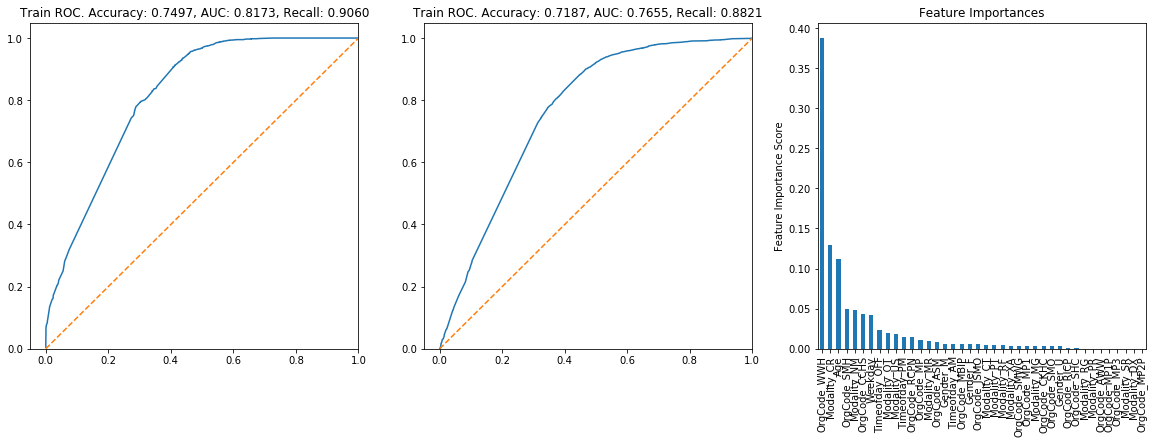

AFTER OPTIMIZATION


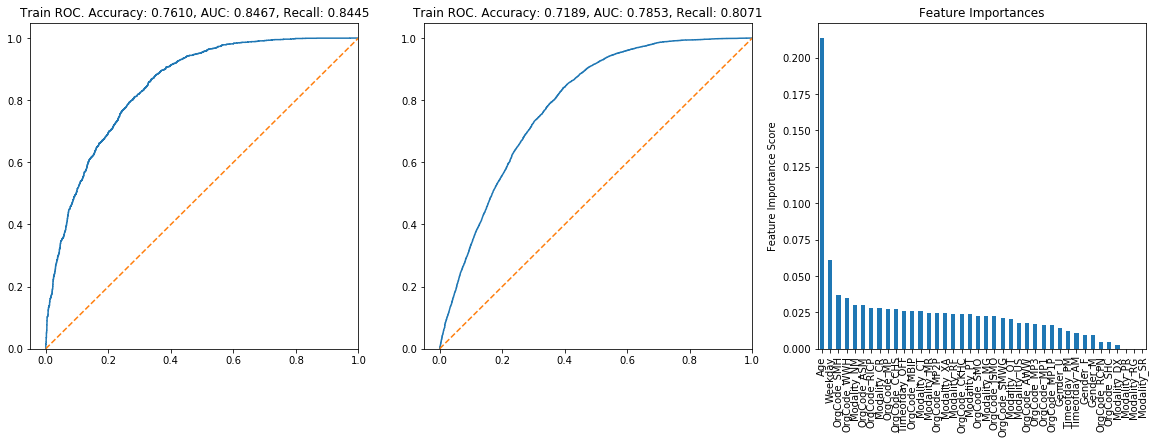

Fold 1


{'n_estimators': 20}

{'max_depth': 10, 'min_samples_split': 700}

{'min_samples_leaf': 1}

{'max_features': 13}

{'subsample': 0.8}

Simple Tree


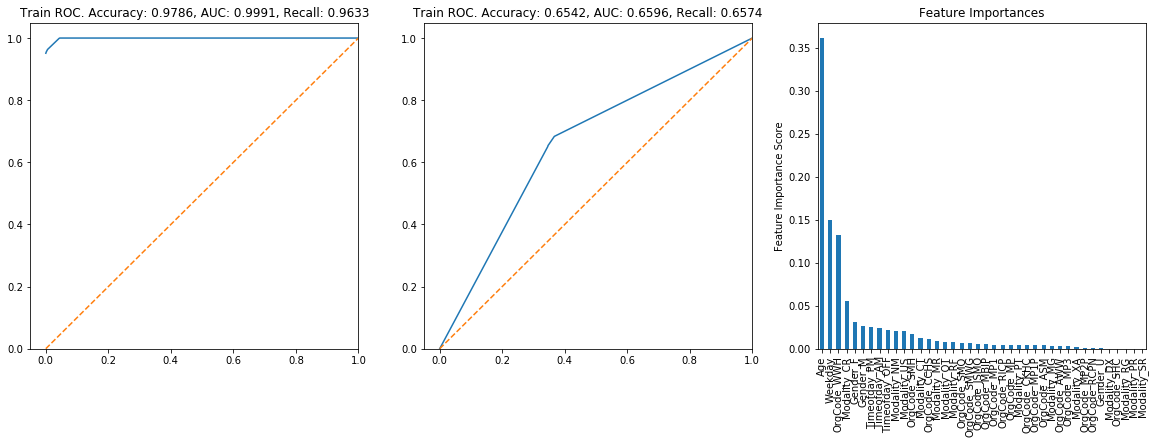

BEFORE OPTIMIZATION


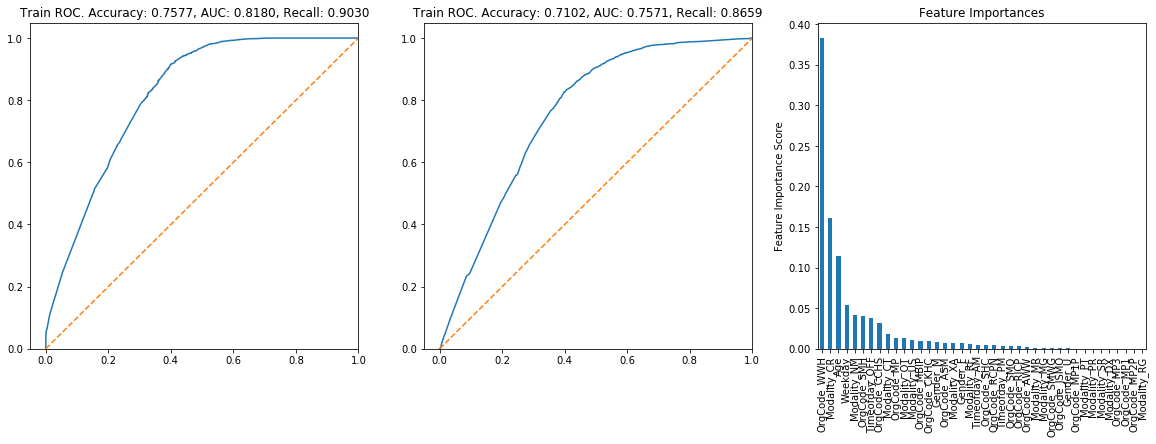

AFTER OPTIMIZATION


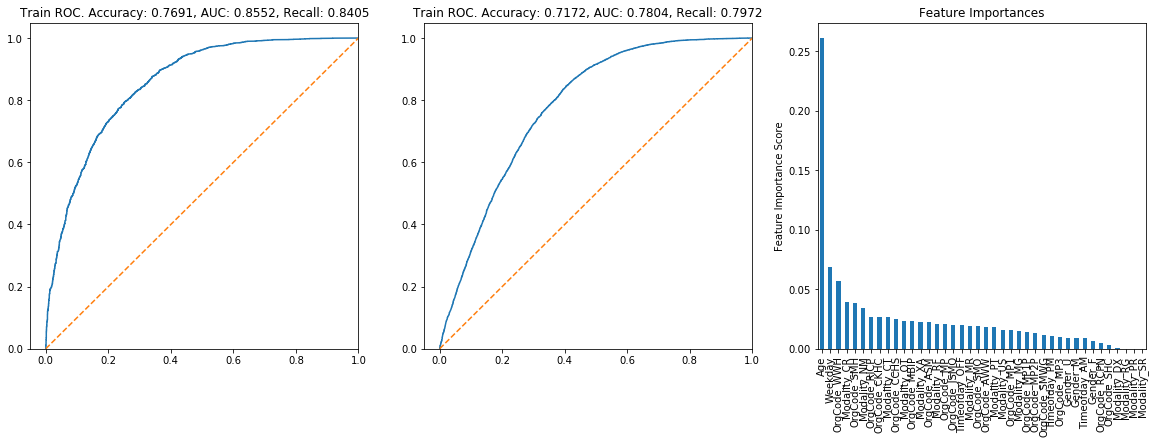

Fold 2


{'n_estimators': 20}

{'max_depth': 11, 'min_samples_split': 1000}

{'min_samples_leaf': 1}

{'max_features': 7}

{'subsample': 0.8}

Simple Tree


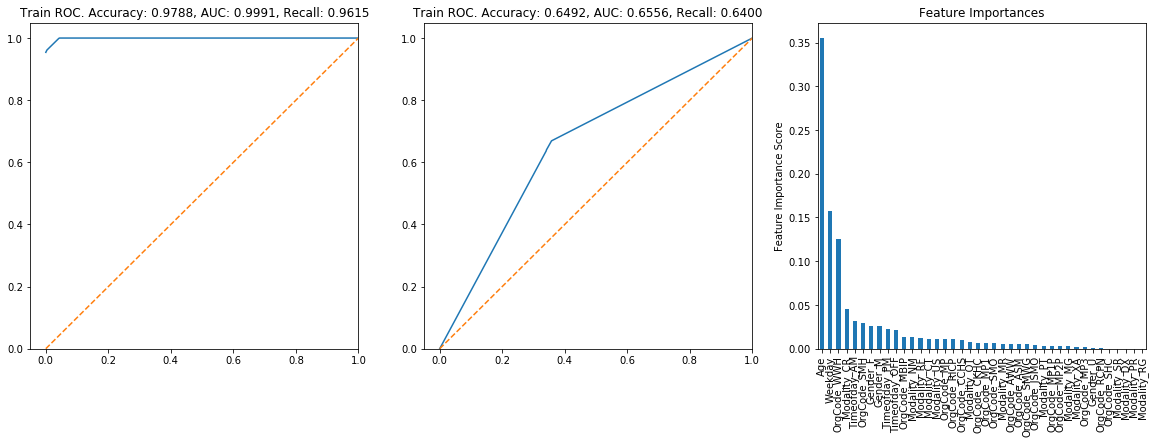

BEFORE OPTIMIZATION


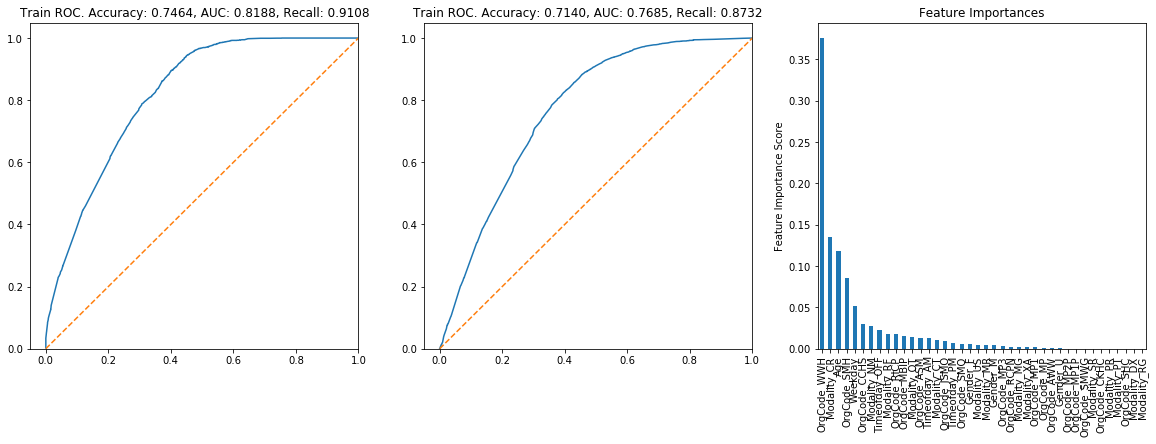

AFTER OPTIMIZATION


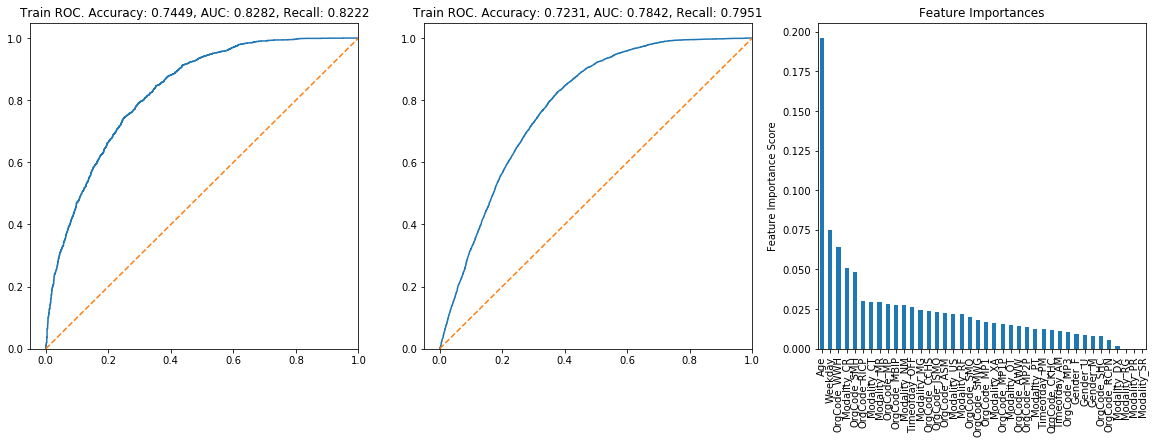

Fold 3


{'n_estimators': 30}

{'max_depth': 4, 'min_samples_split': 200}

{'min_samples_leaf': 1}

{'max_features': 11}

{'subsample': 0.75}

Simple Tree


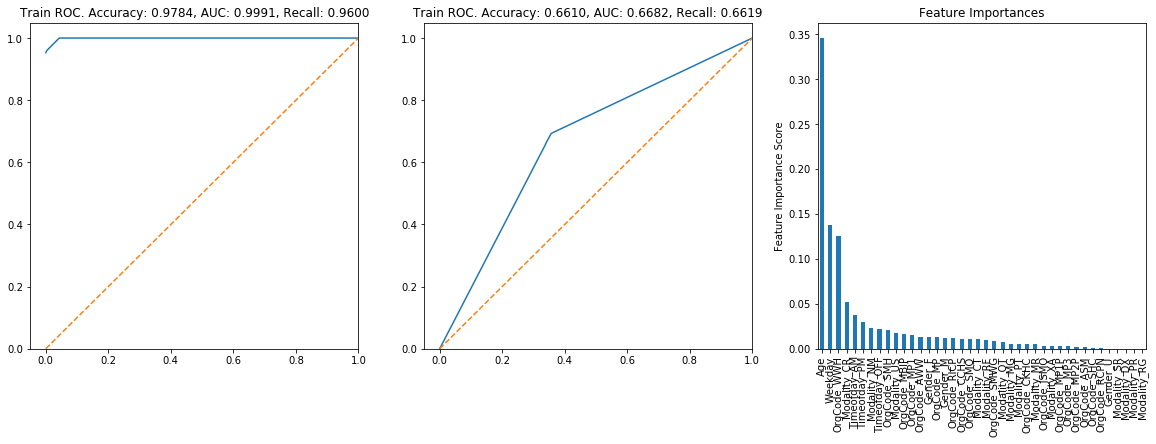

BEFORE OPTIMIZATION


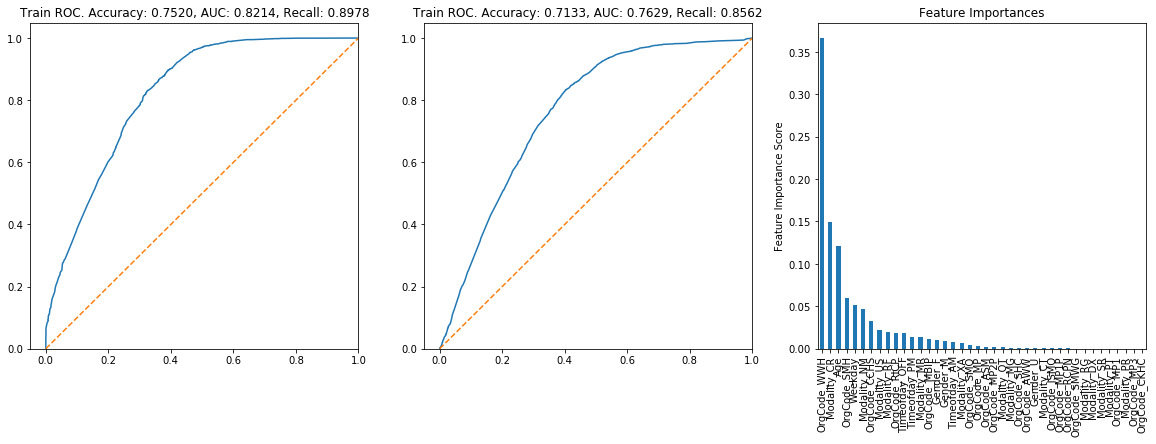

AFTER OPTIMIZATION


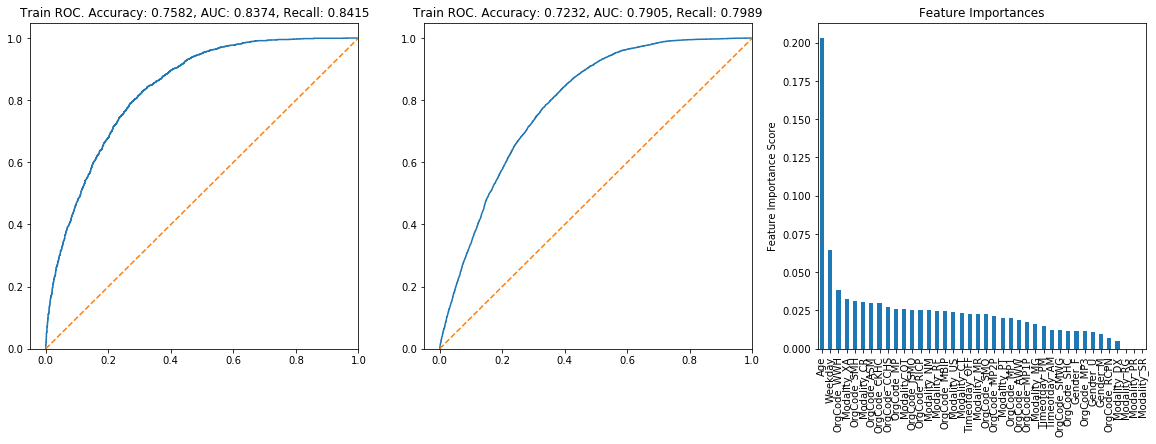

Fold 4


{'n_estimators': 30}

{'max_depth': 4, 'min_samples_split': 100}

{'min_samples_leaf': 1}

{'max_features': 7}

{'subsample': 0.9}

Simple Tree


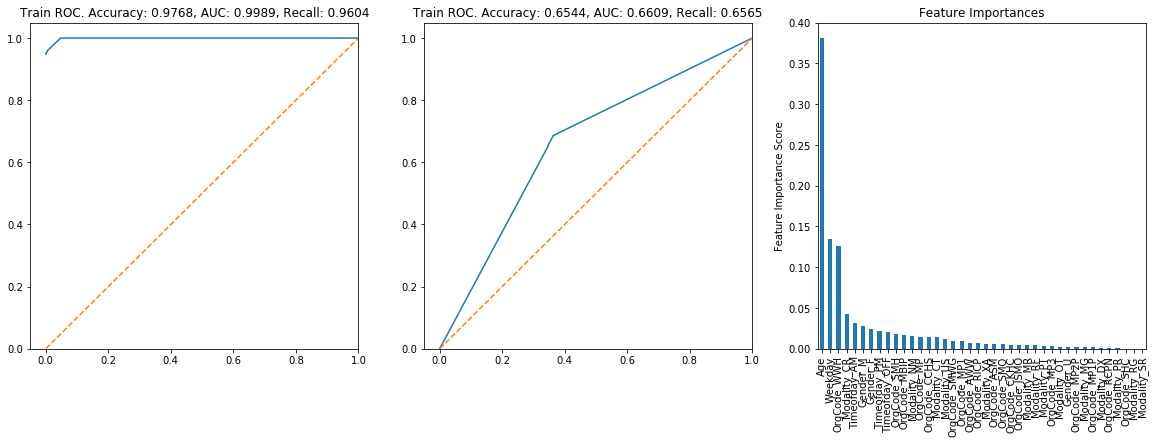

BEFORE OPTIMIZATION


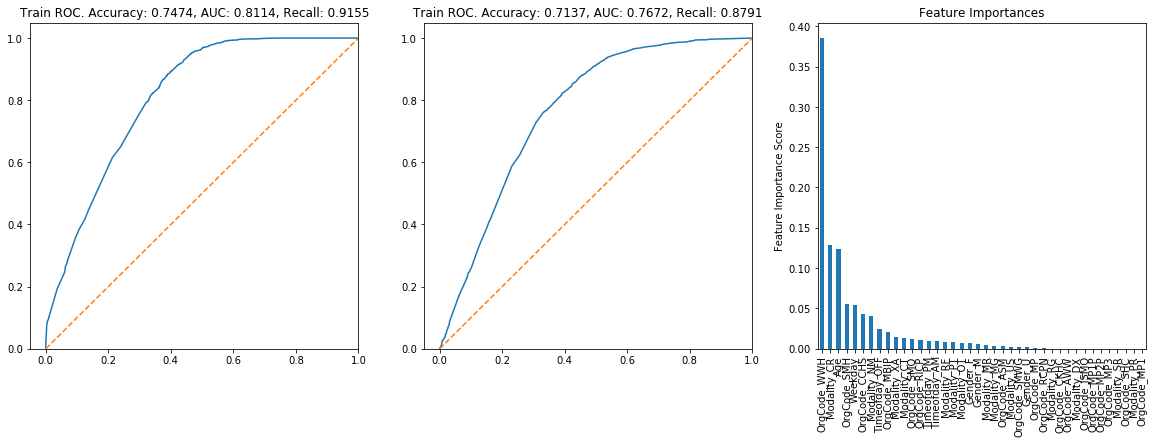

AFTER OPTIMIZATION


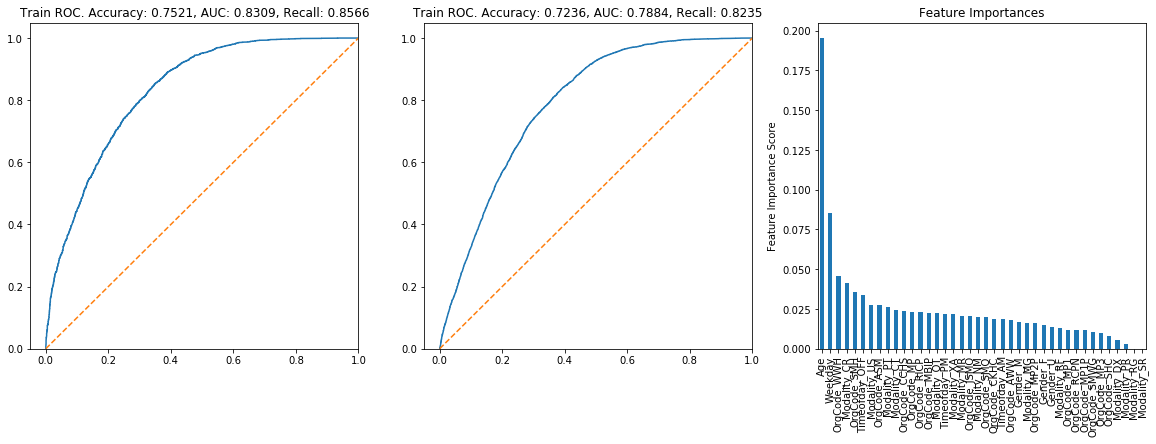

,Fold,Train accuracy,Train AUC,Train recall,Train precision,Train F1,Test accuracy,Test AUC,Test recall,Test precision,Test F1
0,1,0.749728,0.817299,0.906001,0.690929,0.783982,0.718739,0.765546,0.882094,0.667414,0.759882
1,2,0.757664,0.818017,0.902961,0.704033,0.791185,0.710151,0.757112,0.865934,0.661823,0.750244
2,3,0.746379,0.818834,0.910759,0.687025,0.783228,0.714040,0.768450,0.873236,0.664682,0.754818
3,4,0.751993,0.821355,0.897818,0.694124,0.782940,0.713276,0.762894,0.856169,0.669002,0.751101
4,5,0.747416,0.811417,0.915478,0.689498,0.786579,0.713658,0.767150,0.879077,0.662097,0.755313


,Fold,Train accuracy,Train AUC,Train recall,Train precision,Train F1,Test accuracy,Test AUC,Test recall,Test precision,Test F1
0,3.0,0.750636,0.817385,0.906604,0.693122,0.785583,0.713973,0.764231,0.871302,0.665004,0.754272


,Fold,Train accuracy,Train AUC,Train recall,Train precision,Train F1,Test accuracy,Test AUC,Test recall,Test precision,Test F1
0,1,0.760964,0.846698,0.844541,0.724341,0.779836,0.718875,0.785349,0.807112,0.689000,0.743394
1,2,0.769091,0.855183,0.840528,0.740415,0.787302,0.717172,0.780407,0.797189,0.689043,0.739181
2,3,0.744931,0.828162,0.822238,0.714063,0.764342,0.723103,0.784202,0.795109,0.697751,0.743256
3,4,0.758152,0.837386,0.841455,0.720199,0.776119,0.723244,0.790513,0.798870,0.697432,0.744713
4,5,0.752131,0.830930,0.856633,0.713395,0.778480,0.723579,0.788421,0.823482,0.688074,0.749713


,Fold,Train accuracy,Train AUC,Train recall,Train precision,Train F1,Test accuracy,Test AUC,Test recall,Test precision,Test F1
0,3.0,0.750636,0.817385,0.906604,0.693122,0.785583,0.713973,0.764231,0.871302,0.665004,0.754272


,Fold,Train accuracy,Train AUC,Train recall,Train precision,Train F1,Test accuracy,Test AUC,Test recall,Test precision,Test F1
0,1,0.979340,0.999137,0.962401,0.996257,0.979036,0.656035,0.662067,0.654364,0.660653,0.657493
1,2,0.978596,0.999067,0.963254,0.994475,0.978615,0.654210,0.659558,0.657357,0.655702,0.656528
2,3,0.978820,0.999096,0.961497,0.996271,0.978575,0.649189,0.655619,0.640025,0.655766,0.647800
3,4,0.978442,0.999065,0.960000,0.996602,0.977959,0.661033,0.668169,0.661944,0.665465,0.663700
4,5,0.976791,0.998904,0.960414,0.993727,0.976786,0.654360,0.660945,0.656515,0.656160,0.656337


,Fold,Train accuracy,Train AUC,Train recall,Train precision,Train F1,Test accuracy,Test AUC,Test recall,Test precision,Test F1
0,3.0,0.978398,0.999054,0.961513,0.995467,0.978194,0.654965,0.661272,0.654041,0.658749,0.656372


In [3]:
fname = 'features_encoded_processed.csv'
data = pd.read_csv(fname)
labels = data['Labels']
folds = data['Folds']
data_oh = data.iloc[:,:-3]
predictors = data_oh.columns

notnanindex=~np.isnan(data['Weekday'])
data_oh_filled=data_oh[notnanindex]
folds=folds[notnanindex]
labels=labels[notnanindex]

X = data_oh_filled.as_matrix()
Y = labels

n_fold = 5
n_metric=10
metric_before = np.zeros((n_fold,n_metric))
metric_after = np.zeros((n_fold,n_metric))
metric_dtree = np.zeros((n_fold,n_metric))
indexlist = []
for fold in range(0,n_fold):
    print('Fold %d'%fold)
    X_train = X[folds==fold,:]
    X_test = X[folds != fold,:]

    Y_train = Y[folds==fold]
    Y_test = Y[folds != fold]

    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(X_train, Y_train)

    clf2 = GradientBoostingClassifier(learning_rate=0.01,max_depth=8,n_estimators=50)
    clf2 = clf2.fit(X_train, Y_train)

    lr = 1 

    #NUMBER OF ESTIMATORS
    param_test1 = {'n_estimators':np.arange(20,111,10).tolist()}
    gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=lr, min_samples_split=500,
                              min_samples_leaf=50,max_depth=8,max_features='sqrt', subsample=0.8,random_state=10), 
                   param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    gsearch1.fit(X_train, Y_train)
    n_estimators = list(gsearch1.best_params_.values())[0]
    display(gsearch1.best_params_)

    param_test2 = {'max_depth':list(range(1,16,1)), 'min_samples_split':list(range(100,1001,100))}
    gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators,
                                            max_features='sqrt', subsample=0.8, random_state=10), 
                   param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    gsearch2.fit(X_train, Y_train)
    display(gsearch2.best_params_)
    max_depth=list(gsearch2.best_params_.values())[0]
    min_samples_split = list(gsearch2.best_params_.values())[1]

    #Grid seach on subsample and max_features
    param_test3 = {'min_samples_leaf':list(range(1,71,10))}
    gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators,max_depth=max_depth, min_samples_split=min_samples_split,
                                                max_features='sqrt', subsample=0.8, random_state=10), 
                   param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    gsearch3.fit(X_train, Y_train)
    display(gsearch3.best_params_)
    min_samples_leaf = list(gsearch3.best_params_.values())[0]

    #Grid seach on subsample and max_features
    param_test4 = {'max_features':range(5,20,2)}
    gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators,max_depth=max_depth, min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf, subsample=0.8, random_state=10), 
                   param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    gsearch4.fit(X_train, Y_train)
    display(gsearch4.best_params_)
    max_features = list(gsearch4.best_params_.values())[0]

    #Grid seach on subsample and max_features
    param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
    gsearch5=GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=lr, n_estimators=n_estimators,max_depth=max_depth, min_samples_split=min_samples_split,
                                                min_samples_leaf=min_samples_leaf,max_features=max_features, random_state=10), 
                   param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
    gsearch5.fit(X_train, Y_train)
    display(gsearch5.best_params_)
    subsample = list(gsearch5.best_params_.values())[0]
    print('Simple Tree')
    metric_dtree[fold],temp = modelfit(clf, X_train, Y_train, X_test, Y_test, predictors)


    print('BEFORE OPTIMIZATION')
    metric_before[fold],temp = modelfit(clf2, X_train, Y_train, X_test, Y_test, predictors)

    clf3=GradientBoostingClassifier(learning_rate=lr/100, n_estimators=n_estimators*100, max_depth=max_depth, min_samples_split=min_samples_split,
                                                subsample=subsample, max_features=max_features, min_samples_leaf=min_samples_leaf, random_state=10)
    print('AFTER OPTIMIZATION')
    metric_after[fold], indexlist_temp = modelfit(clf3, X_train, Y_train, X_test, Y_test, predictors)
    indexlist.append(indexlist_temp)
    
metricname = ['Train accuracy','Train AUC','Train recall','Train precision' ,'Train F1',
              'Test accuracy','Test AUC','Test recall', 'Test precision','Test F1']

df =pd.DataFrame(metric_before,columns=metricname)
df = pd.concat([pd.DataFrame(np.arange(1,6),columns=['Fold']),df], axis=1)
display(df)
display(pd.DataFrame(df.mean(axis=0)).T)

df2 =pd.DataFrame(metric_after,columns=metricname)
df2 = pd.concat([pd.DataFrame(np.arange(1,6),columns=['Fold']),df2], axis=1)
display(df2)
display(pd.DataFrame(df.mean(axis=0)).T)

dfd =pd.DataFrame(metric_dtree,columns=metricname)
dfd = pd.concat([pd.DataFrame(np.arange(1,6),columns=['Fold']),dfd], axis=1)
display(dfd)
display(pd.DataFrame(dfd.mean(axis=0)).T)

df3 = pd.concat([dfd,df,df2],axis=0)
df3.to_csv('metrics5.csv')


with open('indices.csv', 'w',newline='') as myfile:
    wr = csv.writer(myfile, delimiter=',')
    for folds in indexlist:
        for idlist in folds:
            wr.writerow(idlist)
    
